<a href="https://colab.research.google.com/github/DarkStar1709/CS114.L21/blob/main/colab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Bài tập Colab số 1 12/04: Nhận diện chữ viết tay 
1. Yêu cầu code: 

- Train model cho bài toán
- Truy cập webcam từ laptop từ colab
- Chụp ảnh tờ giấy trước webcam
- Nhận dạng chữ số viết trên tay là số mấy
2. Yêu cầu phân tích:
- Kết quả chạy thực tế có tốt không ?
- Lý do sao nó tốt ?
- Nếu không tốt, nêu lý do?
- Có thể áp dụng bài toán này cho việc đoán biển số nhà không ?



1. **Liệt kê ra các thư viện cho việc tiền xử lý** 

In [ ]:
print(__doc__)

# Author: Gael Varoquaux <gael dot varoquaux at normalesup dot org>
# License: BSD 3 clause

# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


2. **Lấy bộ dữ liệu từ thư viện**


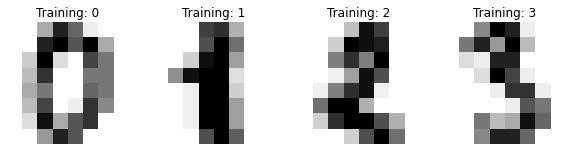

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

3. **Phân loại, train bộ dữ liệu và đưa ra kết quả dự đoán dựa trên bộ test**

In [ ]:
# làm phẳng hình ảnh
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# tạo ra 1 bộ phân loại: 1 vector hỗ trợ phân loại
clf = svm.SVC(gamma=0.001)

# chia dữ liệu 50 để huấn luyện, 50 để kiểm tra bộ dữ liệu con
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

# Học theo các chữ số mói trên bộ huấn luyện
clf.fit(X_train, y_train)

# dự đoán kết quả của chữ số dựa trên bộ kiểm tra
predicted = clf.predict(X_test)

4. **Hiển thị kết quả dự đoán cùng bộ dữ liệu test**

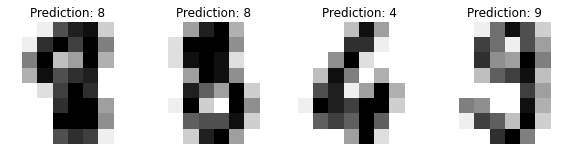

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

5. In ra bản báo cáo phân loại được thể hiện bằng 1 performance metric

In [ ]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

6. In ra 1 confusion matrix để kiểm tra độ chính xác của kết quả so với thực tế


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  0 88  0  0  0  0  4]
 [ 0  0  0  0  0 88  1  0  0  2]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  0  1  0 88  0  0]
 [ 0  0  0  0  0  0  0  0 88  0]
 [ 0  0  0  1  0  1  0  0  0 90]]


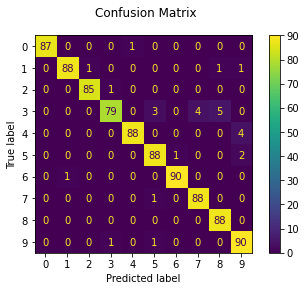

In [ ]:
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

7. Chụp ảnh bằng webcam


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


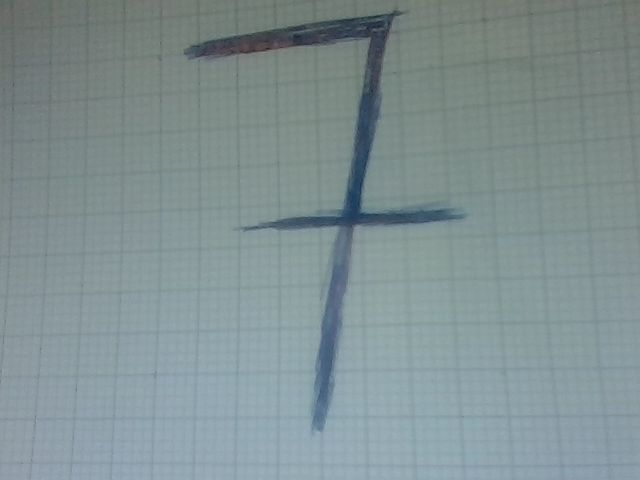

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

8.Xử lý ảnh:

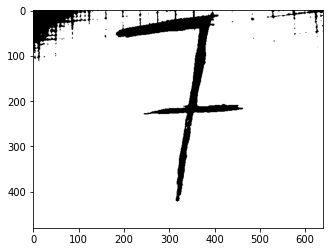

In [ ]:
#Nguồn https://www.it-swarm-vi.com/vi/python/chuyen-doi-hinh-anh-opencv-sang-den-trang/939703473/
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread("photo.jpg")
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
image_blur = cv2.GaussianBlur(image_gray,(5,5),0)
im,thre = cv2.threshold(image_blur,115,255,cv2.THRESH_BINARY_INV)
plt.imshow(thre, cmap = 'gray')
ret,thresh2 = cv2.threshold(thre,127,255,cv2.THRESH_BINARY_INV)
plt.imshow(thresh2,cmap='gray')

9.Resize ảnh:


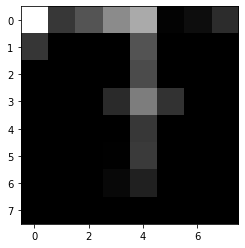

In [ ]:
a = cv2.resize(thre,(8,8),interpolation = cv2.INTER_AREA)
a = a/255 * 13
plt.imshow(a, cmap = 'gray')
a = a.reshape(1, 64)

10. Dự đoán

In [ ]:
predict = clf.predict(a)
print("Result predict:",predict)

Result predict: [7]


**LẤY ẢNH TỪ DRIVE:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Số lượng ảnh trong drive: 20


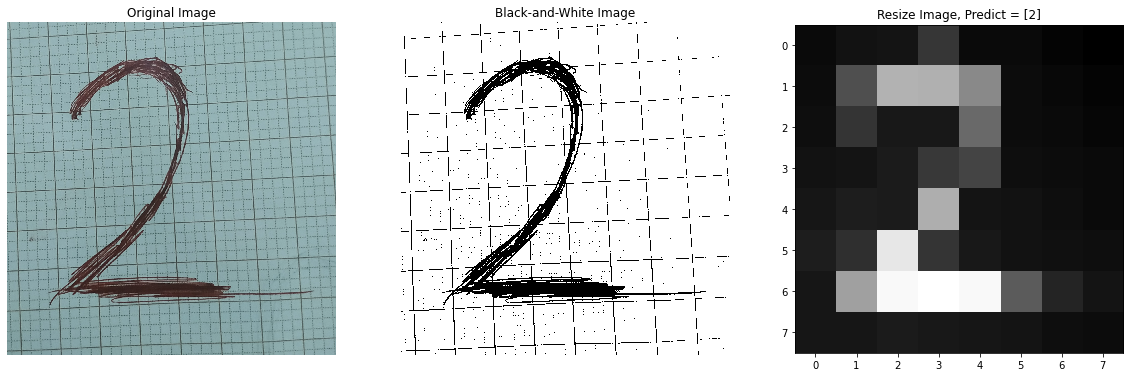

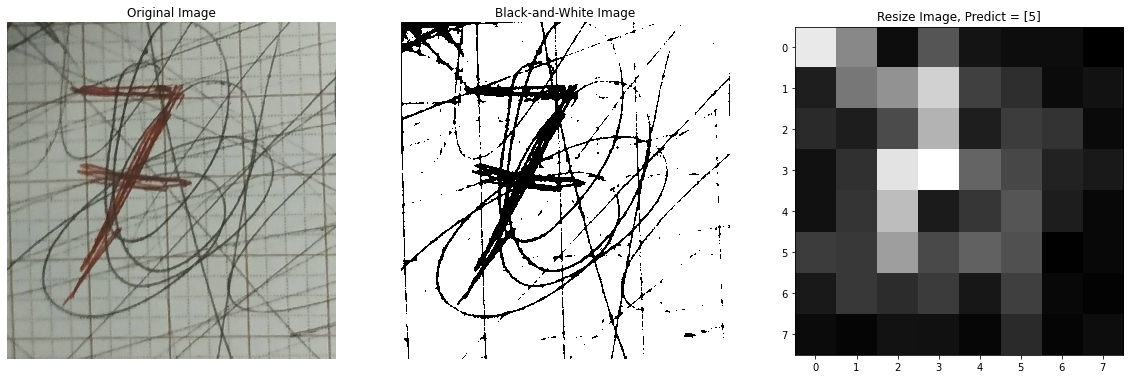

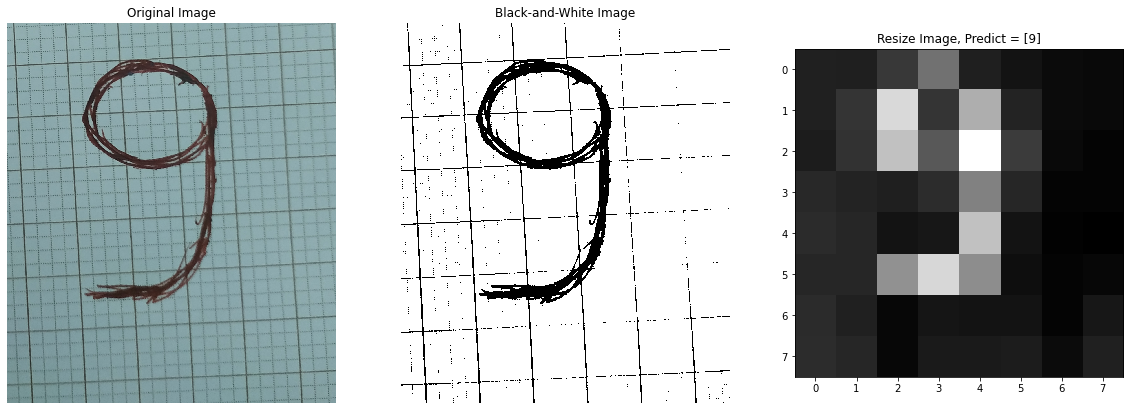

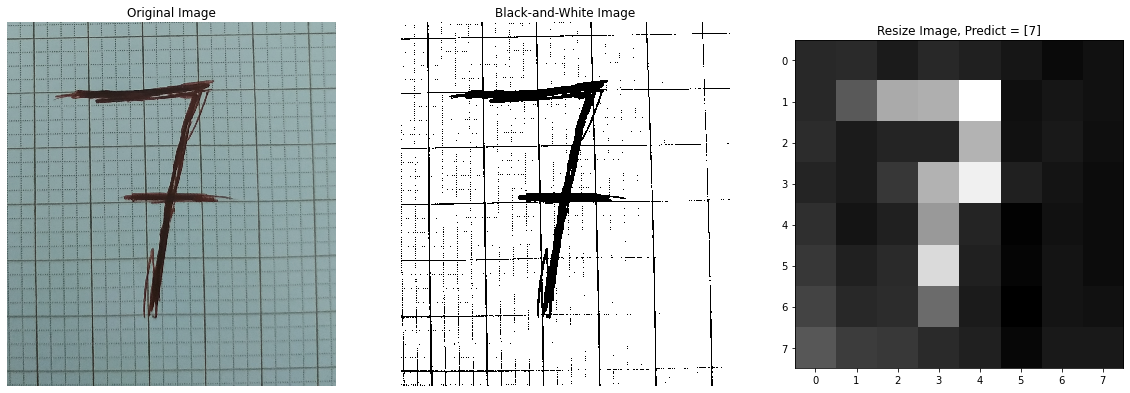

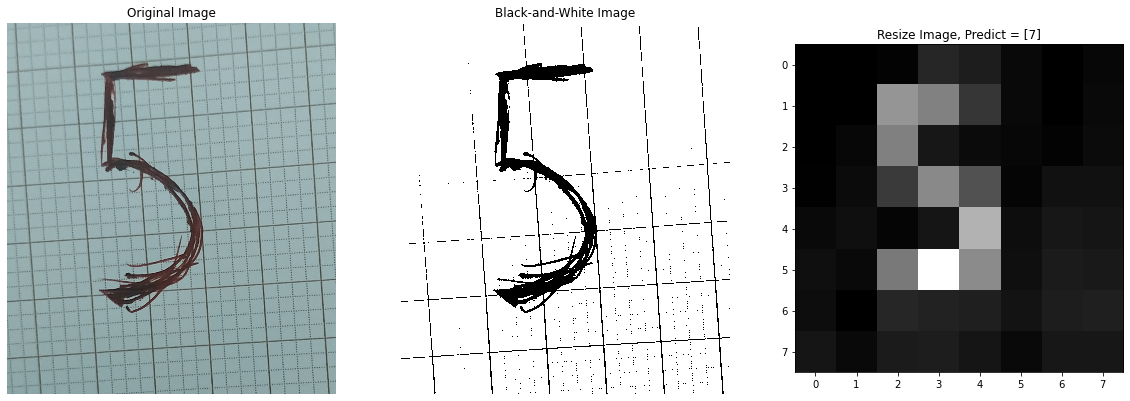

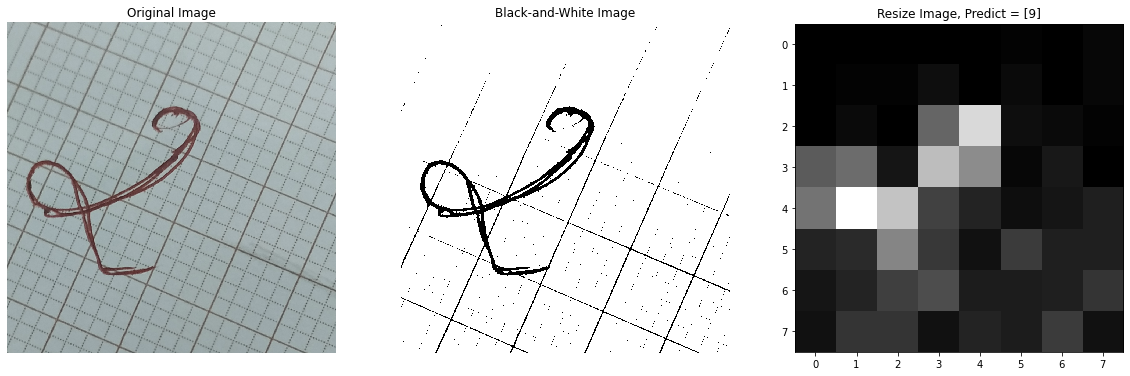

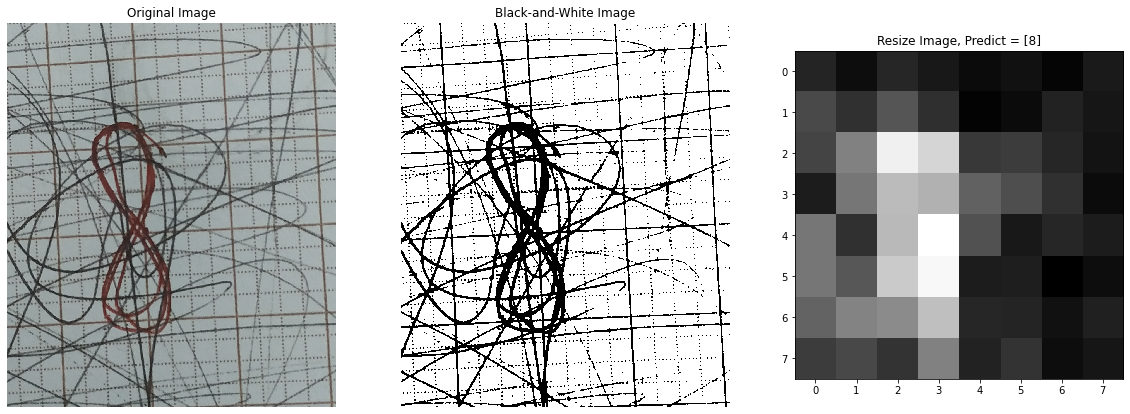

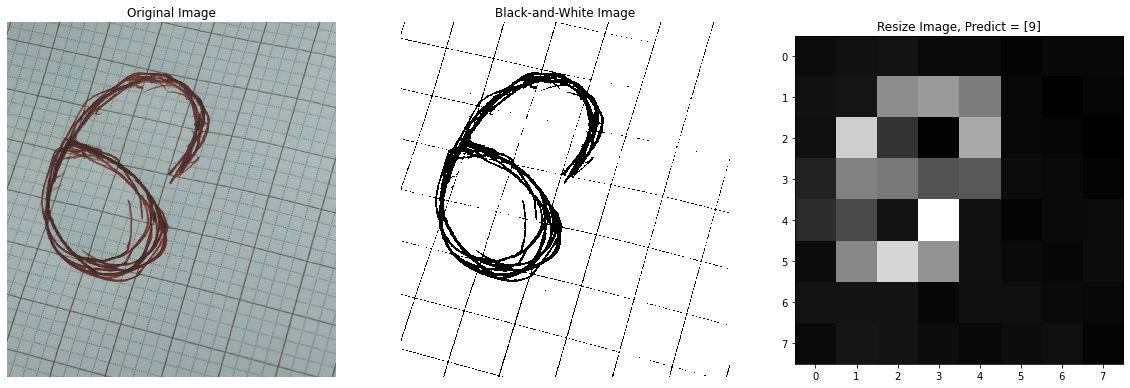

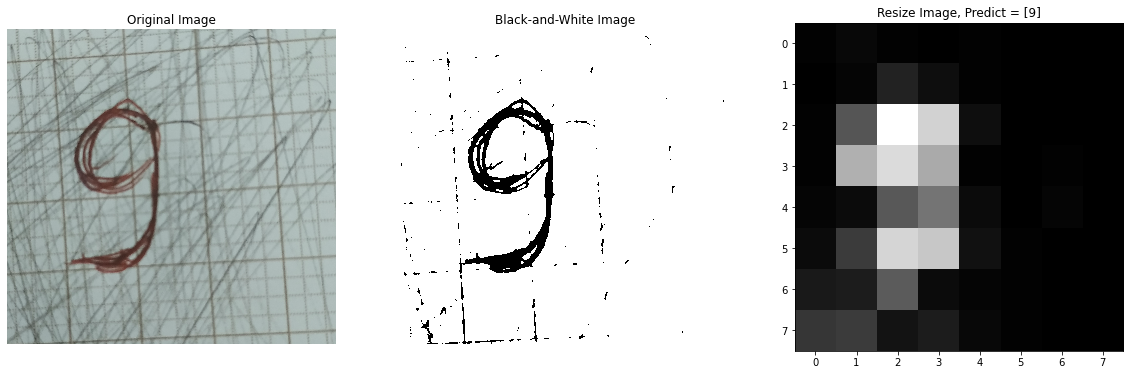

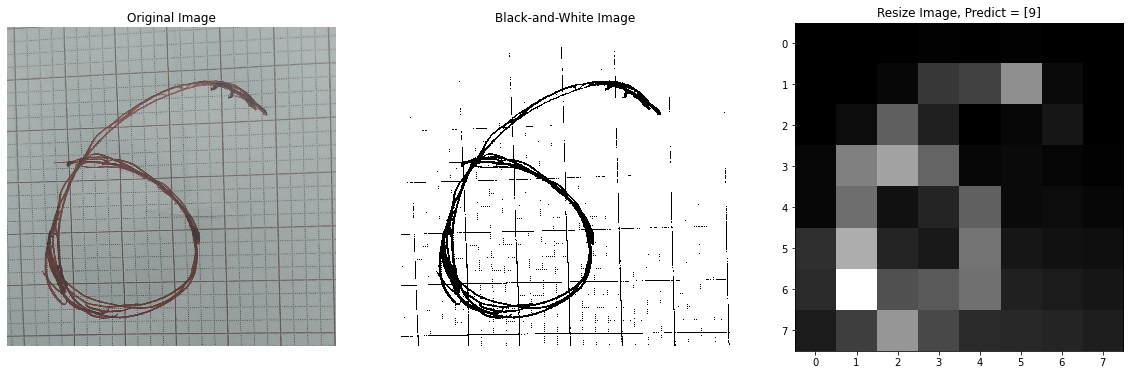

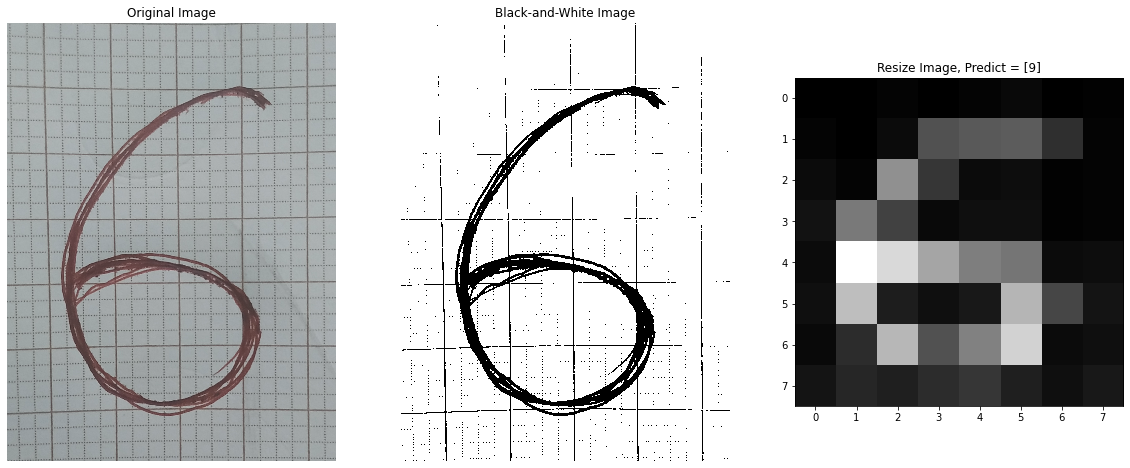

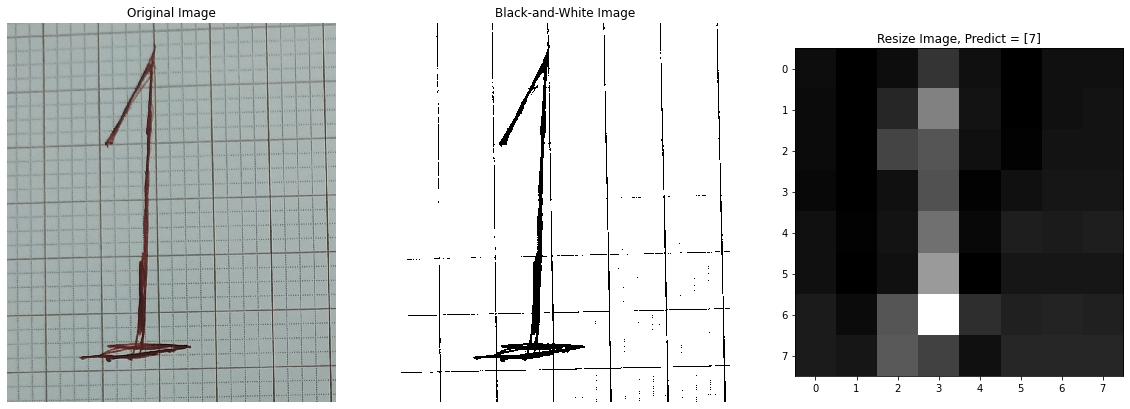

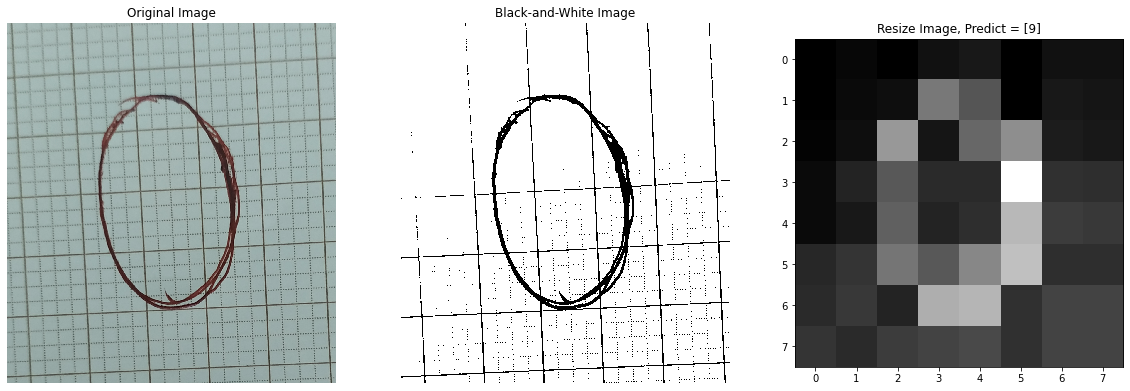

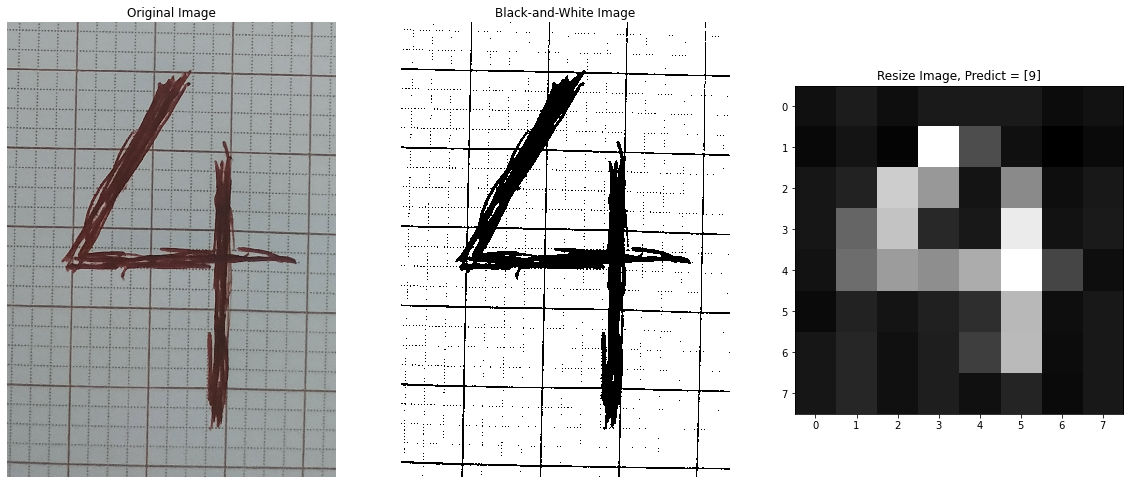

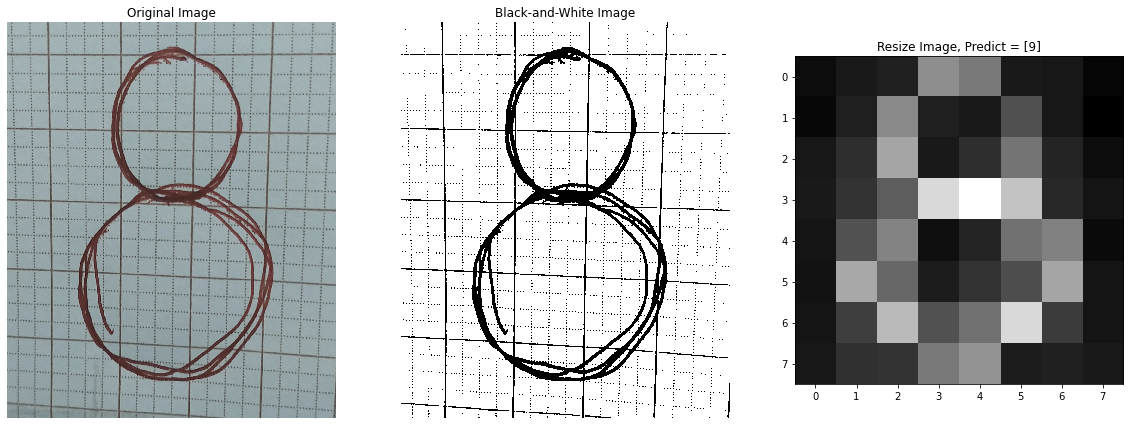

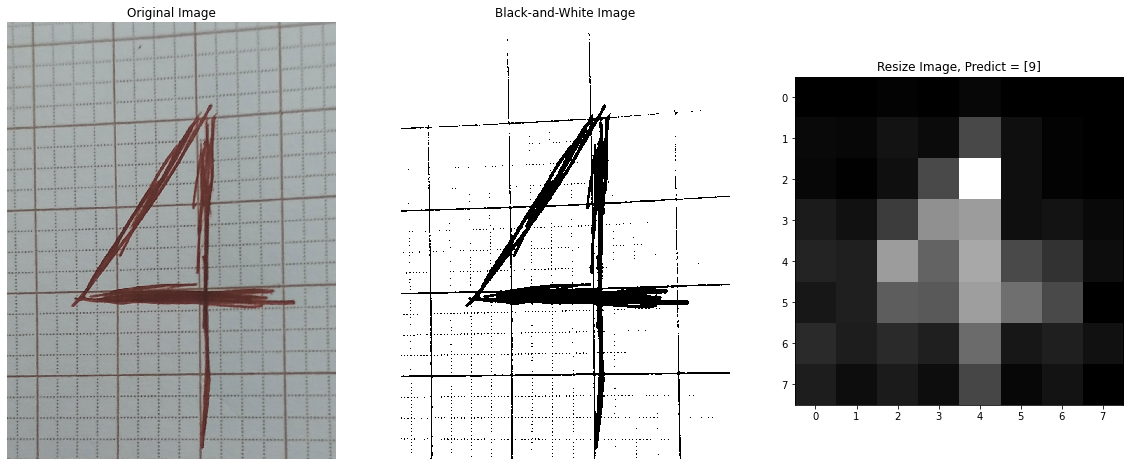

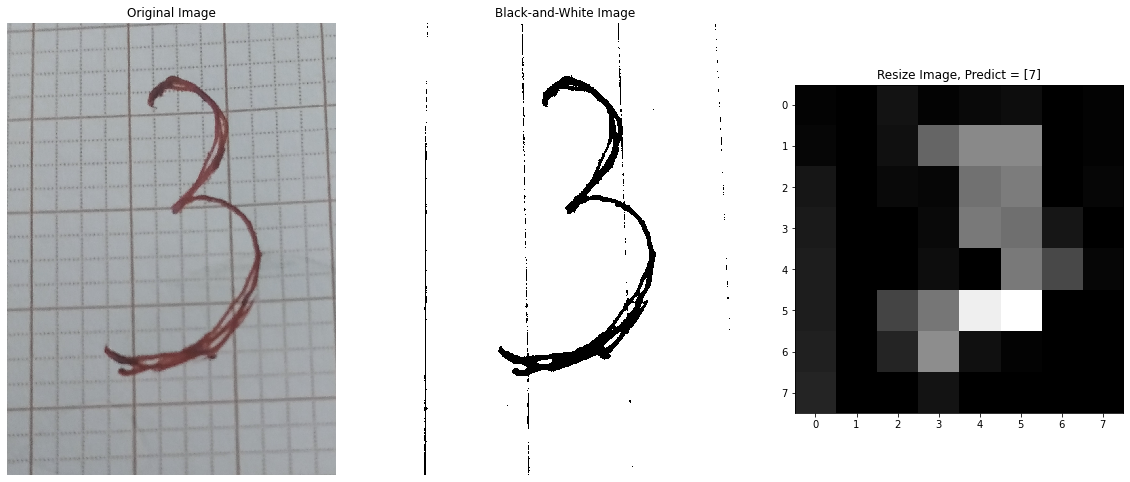

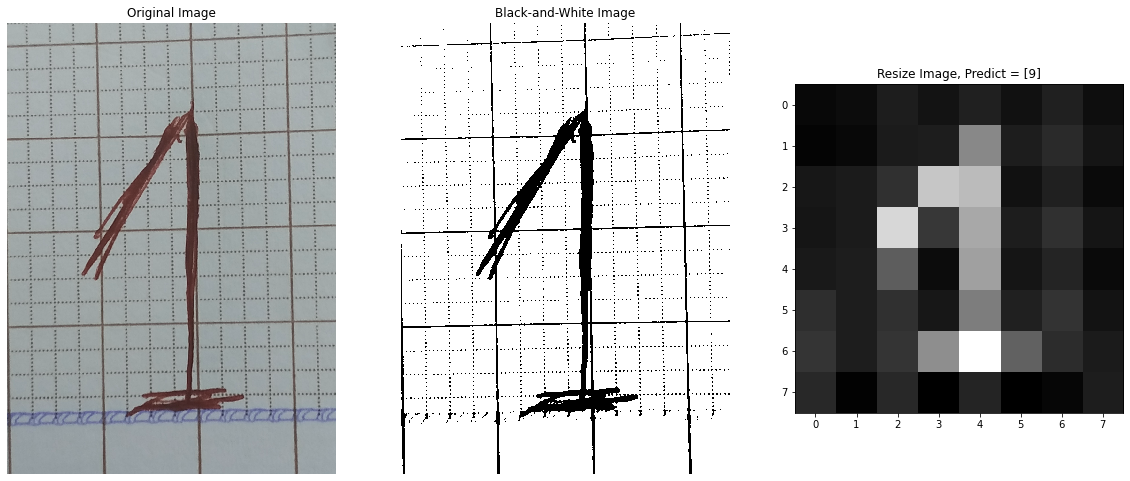

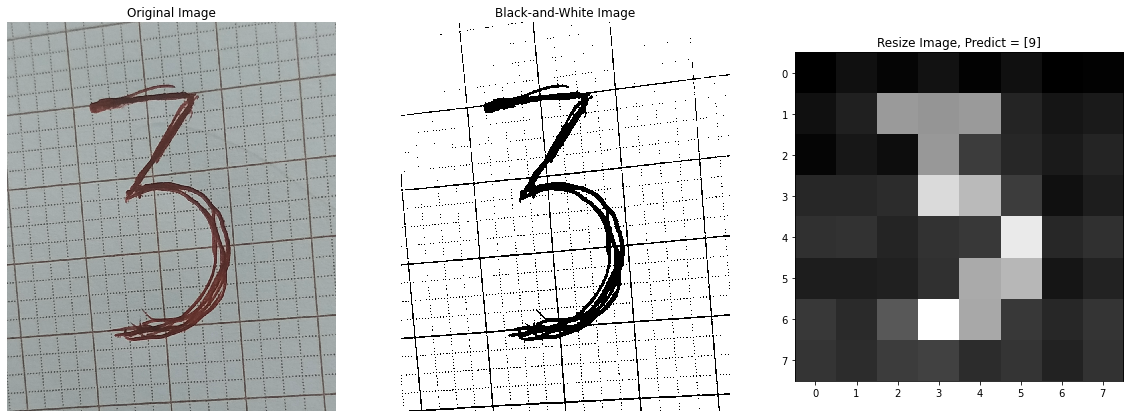

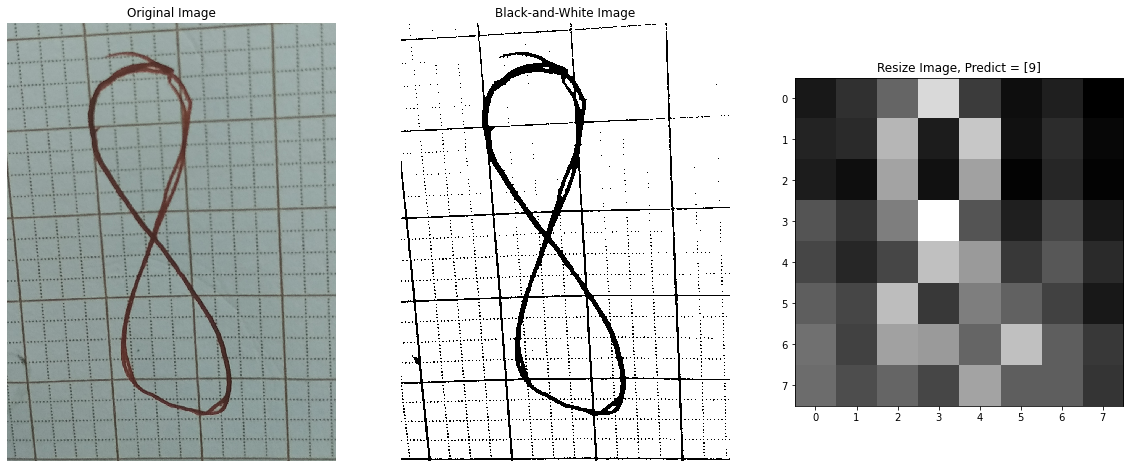

In [ ]:
import os
from google.colab.patches import cv2_imshow

# Link drive: https://drive.google.com/drive/u/0/folders/15kTSMsHLsf6EwYmX5SjoF-Zi5WVCqNbK
link_drive = '/content/drive/MyDrive/DT/'
all_datas = os.listdir(link_drive)
n_i = len(all_datas)
print("Số lượng ảnh trong drive:", n_i)
for i in range(n_i):
  image = cv2.imread(link_drive + all_datas[i])
  _, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
  ax = axes[0]
  ax.set_axis_off()
  #image = cv2.resize(image,(250,350), interpolation = cv2.INTER_AREA)
  ax.imshow(image, interpolation='nearest')
  ax.set_title(f'Original Image')
  ax = axes[1]
  ax.set_axis_off()
  # Đọc ảnh thang độ xám
  image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  image_blur = cv2.GaussianBlur(image_gray,(5,5),0)
  #Chuyển đổi hình ảnh thang độ xám thành nhị phân
  im,thre = cv2.threshold(image_blur,115,255,cv2.THRESH_BINARY_INV)
  #Show ảnh đã xử lý
  ax.imshow(thre,cmap='gray', interpolation='nearest')
  ret,thresh2 = cv2.threshold(thre,127,255,cv2.THRESH_BINARY_INV)
  ax.imshow(thresh2,cmap='gray', interpolation='nearest')
  ax.set_title(f'Black-and-White Image')
  #Resize ảnh
  ax = axes[2]
  a = cv2.resize(thre,(8,8),interpolation = cv2.INTER_AREA)
  a = a/255 * 13
  plt.imshow(a, cmap = 'gray', interpolation='nearest')
  a = a.reshape(1, 64) 
  #Predict Image
  predict = clf.predict(a)
  ax.set_title(f'Resize Image, Predict = {predict}')

Nhận xét:
Kết quả dự đoán không được tốt, tỉ lệ thấp: 25%.

Lý do:
+ Điều kiện chụp ảnh chưa được tốt ( Buổi tối, nguồn sáng thấp, đèn led chụp không rõ bằng ánh sáng tự nhiên)
+Việc xử lý ảnh chưa được tốt nên chưa lấy được chuẩn nét
+ Một số hình ảnh số nghiêng, hoặc là có nét mực khác xen kẽ nên không xử lý, nhận dạng được
#**Kết luận**
* Kết quả chạy thực tế có tốt không ?
  * Kết quả chạy thực tế không tốt lắm.
* Lí do : 
  * Chưa được tốt là vì xử lí ảnh chưa được chuẩn nét để cho máy đoán được số đó
* Có thể áp dụng bài toán này cho việc đoán biển số nhà không ?
  * Rất khó để áp dụng bài này cho bài dự đoán biển số nhà. Tại vì biển số nhà còn có các chữ cái như A,B,C,... cho nên để áp dụng được cho bài toán dự đoán biển số nhà cần phải có dataset lớn hơn và phải có code xử lí nhận diện ảnh tốt hơn nữa